In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [1]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# K-Means Clustering

Determining “k” value from the elbow method

In [2]:
#########################begin code for Task 1-a

df = pd.read_csv('College.csv')
df.head()


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
df.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [4]:
#to remove the first column that is unnamed which is not required for clustering
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] #https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe
df.columns[0]

'Private'

In [5]:
#replacing yes and no in the Private column to 1 and 0 respectively
df.Private.replace(('Yes', 'No'), (1, 0), inplace=True)
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


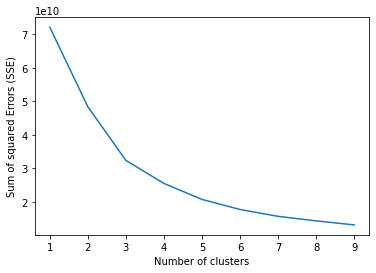

In [6]:
#Elbow method to find the optimum value of k
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)    #https://predictivehacks.com/k-means-elbow-method-code-for-python/
    df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared Errors (SSE)")
plt.show()

#From the elbow method we can understand that the best value for k is 3

#########################end code for Task 1-a

### Visualization for K-Means Clustering

In [10]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing

### Important!!!
X = df.drop('Private', axis=1) #drop the target varible from the other variables
Y = df['Private'] #include only target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle=True)
###################end code for Task 1-b-1

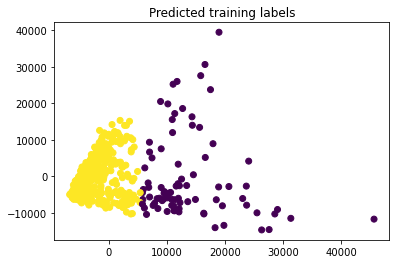

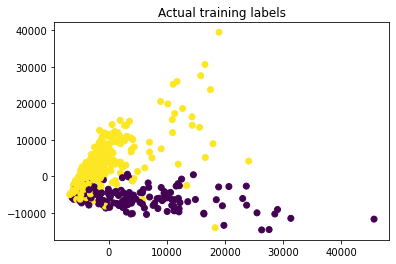

In [11]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA

# Create the KMeans model
KMeans_model = KMeans(n_clusters=2,random_state=0)

# Compute cluster centers and predict cluster index for each sample 
X_Train_kmeans = KMeans_model.fit_predict(X_train)
centers=KMeans_model.cluster_centers_
#print(centers)

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

plt.scatter(x,y,c=X_Train_kmeans)
plt.title('Predicted training labels')
plt.show()

plt.scatter(x,y,c=Y_train)
plt.title('Actual training labels')
plt.show()




###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

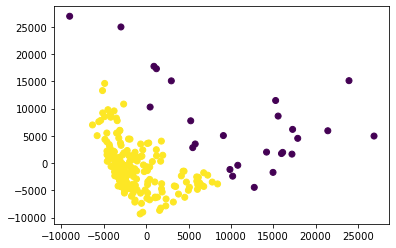

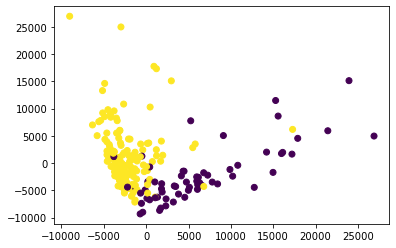

In [12]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 
X_Test_kmeans = KMeans_model.fit_predict(X_test)

# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

plt.scatter(x,y,c=X_Test_kmeans)
plt.show()

plt.scatter(x,y,c=Y_test)
plt.show()


###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [13]:
###################begin code for Task 1-b-4: Print out a confusion matrix

print(f"CONFUSION MATRIX:\n{confusion_matrix(Y_test, X_Test_kmeans)}")

###################end code for Task 1-b-4

CONFUSION MATRIX:
[[ 17  46]
 [  9 162]]


# Hierarchical Agglomerative  Clustering

## Finding the best Hierarchical Agglomerative Clustering Model

In [15]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances

# Import f1_score
from sklearn.metrics import f1_score

map = {}
## Calculate pairwise distance matrix for X_train
pdm_train = X_train
cosine_distance = pairwise_distances(pdm_train,metric='cosine')
euclidean_distance = pairwise_distances(pdm_train,metric='euclidean')
manhattan_distance = pairwise_distances(pdm_train,metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cosine_complete = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)
f1_cosine_complete = f1_score(Y_train,cosine_complete, average='weighted')
map.update( {f1_cosine_complete:'cosine_complete'} )
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
euclidean_complete = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)
f1_euclidean_complete = f1_score(Y_train,euclidean_complete, average='weighted')
map.update( {f1_euclidean_complete:'euclidean_complete'} )
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
manhattan_complete = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)
f1_manhattan_complete = f1_score(Y_train,manhattan_complete, average='weighted')
map.update( {f1_manhattan_complete:'manhattan_complete'} )
## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cosine_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)
f1_cosine_avg = f1_score(Y_train,cosine_avg, average='weighted')
map.update( {f1_cosine_avg:'cosine_avg'} )

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
euclidean_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)
f1_euclidean_avg = f1_score(Y_train,euclidean_avg, average='weighted')
map.update( {f1_euclidean_avg:'euclidean_avg'} )

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
manhattan_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)
f1_manhattan_avg = f1_score(Y_train,manhattan_avg, average='weighted')
map.update( {f1_manhattan_avg:'manhattan_avg'} )

print("F1-score for complete linkage + cosine", f1_cosine_complete)
print("F1-score for complete linkage + euclidean", f1_euclidean_complete)
print("F1-score for complete linkage + manhattan", f1_manhattan_complete)
print("F1-score for average linkage + cosine", f1_cosine_avg)
print("F1-score for average linkage + euclidean", f1_euclidean_avg)
print("F1-score for average linkage + manhattan", f1_manhattan_avg)

maxValue=max(f1_cosine_complete,f1_euclidean_complete,f1_manhattan_complete,f1_cosine_avg,f1_euclidean_avg,f1_manhattan_avg)
print("the best pair of linkage method and similarity measure :", maxValue, " is ", map.get(maxValue))
#Best pair of linkage method and similarity measure using F1 score for evaluation and taking n_clusters = 2 is complete linkage + manhattan.

#https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn


###################end code for Task 2-a

F1-score for complete linkage + cosine 0.9206196267530241
F1-score for complete linkage + euclidean 0.11754390173048378
F1-score for complete linkage + manhattan 0.8302706078678705
F1-score for average linkage + cosine 0.9085352495817234
F1-score for average linkage + euclidean 0.11754390173048378
F1-score for average linkage + manhattan 0.11754390173048378
the best pair of linkage method and similarity measure : 0.9206196267530241  is  cosine_complete


## Visualization for Hierarchical Agglomerative Clustering

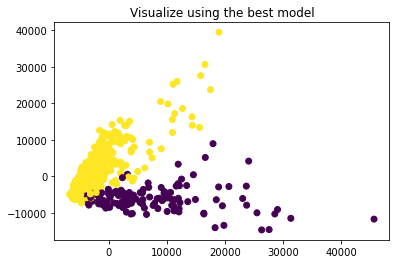

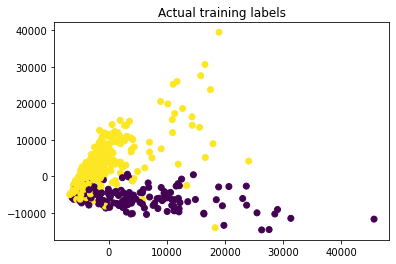

In [16]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels

# Visualize the predicted training labels versus actual training labels.
 
models = {'cosine_complete':f1_cosine_complete,'euclidean_complete':f1_euclidean_complete,'manhattan_complete':f1_manhattan_complete,'cosine_avg':f1_cosine_avg,'euclidean_avg':f1_euclidean_avg,'manhattan_avg':f1_manhattan_avg}
best_model_val = max(models,key=models.get)

if best_model_val == 'cosine_complete':
    best_model = cosine_complete

elif best_model_val == 'euclidean_complete':
    best_model = euclidean_complete

elif best_model_val == 'manhattan_complete':
    best_model = manhattan_complete

elif best_model_val == 'cosine_avg':
    best_model = cosine_avg

elif best_model_val == 'euclidean_avg':
    best_model = euclidean_avg

elif best_model_val == 'manhattan_avg':
    best_model = manhattan_avg

else:
    best_model = None

X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels versus actual training labels. 
x = X_train_pca[:,0]
y = X_train_pca[:,1]
plt.scatter(x,y,c=best_model)
plt.title("Visualize using the best model")
plt.show()

plt.scatter(x,y,c=Y_train)
plt.title('Actual training labels')
plt.show()


###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


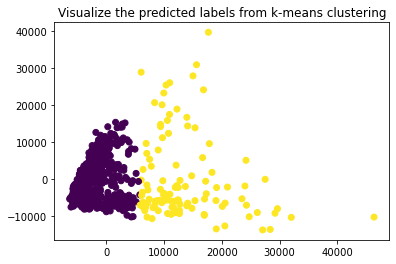

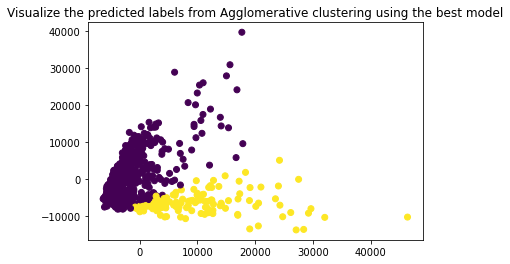

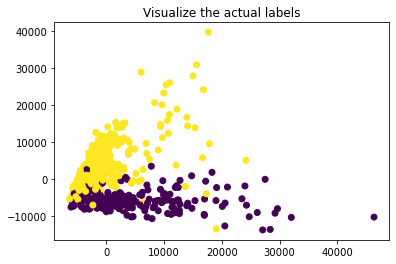

In [17]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
dataset_Kmeans = KMeans(n_clusters=2,random_state=0)
datset_fit_Kmeans = dataset_Kmeans.fit_predict(df)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
best_pdm = pairwise_distances(df, metric='cosine')
# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
agglomerativeClustering = AgglomerativeClustering(n_clusters=2)  
agglomerativeClustering_fitPredict = agglomerativeClustering.fit_predict(best_pdm)



### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(df)

# Visualize the predicted Kmeans labels versus the predicted Agglomerative labels versus Actual labels. 
#KMeans
x = X_pca[:,0]
y3 = X_pca[:,1]
plt.scatter(x,y3,c=datset_fit_Kmeans)
plt.title("Visualize the predicted labels from k-means clustering")
plt.show() 

#Agglomorative 
x = X_pca[:,0]
y2 = X_pca[:,1]
plt.scatter(x,y2,c=agglomerativeClustering_fitPredict)
plt.title("Visualize the predicted labels from Agglomerative clustering using the best model")
plt.show()

#Actual
x = X_pca[:,0]
y1 = X_pca[:,1]
plt.scatter(x,y1,c=Y)
plt.title("Visualize the actual labels")
plt.show()


###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [18]:
###################begin code for Task 3-b
from sklearn.metrics import accuracy_score

kmeanCompare = KMeans(2)
kMeanFitPredict = kmeanCompare.fit_predict(df)

print("confusion_matrix for kmeans")
print(confusion_matrix(Y, datset_fit_Kmeans))
print("confusion_matrix for AgglomerativeClustering")
print(confusion_matrix(Y, agglomerativeClustering_fitPredict))
print("classification_report for kmeans")
print(classification_report(Y, datset_fit_Kmeans))
print("classification_report for AgglomerativeClustering")
print(classification_report(Y, agglomerativeClustering_fitPredict))
print("Reasoning: KMeans took lesser time to execute than Agglomerative Clustering and also KMeans clustering was more accurate than Agglomerative Clustering based on the values of the confusion matrix and classification_reports")



###################end code for Task 3-b

confusion_matrix for kmeans
[[138  74]
 [531  34]]
confusion_matrix for AgglomerativeClustering
[[ 94 118]
 [558   7]]
classification_report for kmeans
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

classification_report for AgglomerativeClustering
              precision    recall  f1-score   support

           0       0.14      0.44      0.22       212
           1       0.06      0.01      0.02       565

    accuracy                           0.13       777
   macro avg       0.10      0.23      0.12       777
weighted avg       0.08      0.13      0.07       777

Reasoning: KMeans took lesser time to execute than Agglomerative Clustering and also KMeans clustering was more accurate than Agglomerative Clus

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[45 points] Task 1:</b>  

    [15 points] Task 1-a: Determine “k” value from the elbow method

    [30 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a confusion matrix
    


<b>[50 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points